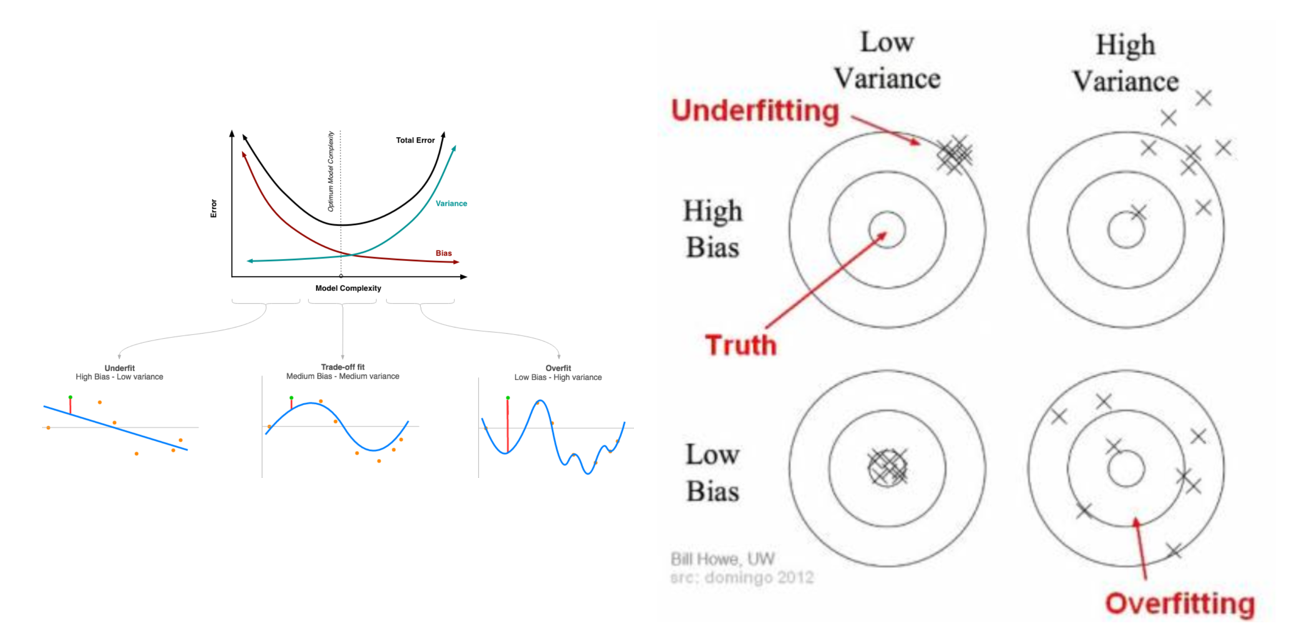

- 결과와 떨어진 정도 : vias
- 분산 : variance : 흩어진 정도
- 일반화된 모델 알고리즘 : 마스터 알고리즘
- vias 와 variance는 trade-off 관계 : 한 쪽이 커지면 한 쪽이 작아져야

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mino

C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219

# 사이킷런

- model-selection 관점에 집중

In [5]:
from sklearn.datasets import load_iris

In [6]:
# snake 방식 -> function

In [4]:
# load_(크기가 작은 데이터)
# patch_(인터넷에서 가져옴. 큼)
# make_(랜덤하게 생성)

In [7]:
data = load_iris()

In [11]:
data     # numpy 기반
         # gpu 지원 안된다

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
type(data)

sklearn.utils.Bunch

In [13]:
# Bunch 관례상 묶음을 의미 -> 쪼갤 수 있다

In [14]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [15]:
# 데이터에서는 항상 설명이 있어야

In [17]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
# iris는 기본적으로 classification 데이터

In [19]:
# 앞으로 판다스로 불러올 것( 랭글링)

In [21]:
iris = pd.DataFrame(data.data) #data.data 가 전체 데이터

In [23]:
iris.head() # column = dimension = feature. 이제 이름 바꿀 것

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
iris = pd.DataFrame(data.data, columns = data.feature_names)

In [27]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# 안좋은 방식. 이름에 공백도 괄호도 있어서

In [30]:
# 결과값. labeling데이터가 없으므로 붙인다

In [31]:
iris_target = pd.DataFrame(data.target)

In [33]:
iris_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [35]:
data.target_names # 차례대로 0, 1, 2를 의미

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
iris_target = pd.DataFrame(data.target, columns = ['target'])

In [37]:
iris_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [38]:
pd.concat([iris,iris_target], axis = 1) # 위아래가 아닌 좌우로 붙여야

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [39]:
# pd. 붙었으니 이름 새로 붙여야
iris = pd.concat([iris,iris_target], axis = 1) 

In [40]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 사용방법
#### 1. 알고리즘 불러오기

In [41]:
from sklearn.neighbors import KNeighborsClassifier # iris 데이터는 classification 데이터

In [42]:
# 이름 카넬 방식 -> 방식 : 클래스 -> 인스턴스화 해야

#### 2. 인스턴스화

In [44]:
knn = KNeighborsClassifier() # 안의 값들을 바꿔 최적의 값들을 찾는다

**modelselcection이 중요한 이유**
 1. model 마다 특정 분포에 성능이 좋은 알고리즘이 있다
 2. 알고리즘보다 중요한 것은 좋은 데이터의 양이다

In [45]:
# 아무것도 입력하지 않으면 기본 parameter 나온다

#### 3. 학습시킨다

In [46]:
# computer science에서는 training, 통계에서는 fit라고 한다

In [47]:
# training 시킬 데이터와 target 시킬 데이터를 분리시켜야

In [49]:
# 행렬은 대문자쓴다
# 벡터는 보통 소문자쓴다

In [52]:
# fancy indexing 혹은 iloc 통해 뽑아낸다

In [50]:
iris[iris.columns[:-1]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [51]:
iris.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [53]:
knn.fit(iris.iloc[:,:-1], iris[iris.columns[-1]] ) # 행렬값, 타겟 값

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
# 타입은 인스턴스 값 -> vars로 볼 수 있다

In [55]:
knn2 = KNeighborsClassifier()

In [56]:
vars(knn2)

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [57]:
knn2.fit(iris.iloc[:,:-1], iris[iris.columns[-1]] ) # 행렬값, 타겟 값

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
vars(knn2) # 학습시키고 vars 해보자

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'outputs_2d_': False,
 'classes_': array([0, 1, 2]),
 '_y': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
    

In [59]:
# 새로운 객체가 만들어진 것.

In [60]:
# 학습을 시켰으니 이제 예측 가능(prediction)

In [64]:
knn2.predict([[3,3,3,3]])

array([1])

In [66]:
data.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [70]:
# 이렇게 예측

In [71]:
# 괄호 하나만 하면 에러가 난다.
# reshape. -1 개념은 자동으로 넣어준다
# 4가지를 넣어라 즉 (X, 1) 형태로 넣어라
# 2개 동시에도 넣을 수 있따

In [73]:
knn2.predict([[3,4,1,2],[3,3,3,3]])

array([0, 1])

In [74]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
# 얘는 무조건 2차원 데이터

In [78]:
# ex)
a = np.array([1,2,3,4]).reshape(1,4)

In [81]:
a # reshape하면 []가 하나 더 생김

array([[1, 2, 3, 4]])

In [82]:
# 20분 대 녹음 꼭 듣기

In [84]:
a = knn2.predict([[3,4,1,2]])

In [85]:
a

array([0])

In [86]:
knn2.predict_proba([[3,4,1,2]]) #proba = probability 즉 nomalization 시킨다

array([[1., 0., 0.]])

In [92]:
knn2.predict_proba([[3,3,3,3]]) 

# 전체가 다섯개 있었으므로 이렇게 퍼센테이지가 나올 것이고, 
# 3 종류 중에 두번째것이 0.8, 세번째것이 0.2

array([[0. , 0.8, 0.2]])

In [95]:
knn2.predict_proba([[3,2,3,1]])

array([[0.2, 0.8, 0. ]])

In [98]:
knn2.get_params() # 내가 바꿀 수 있는 hyper parameter. 얘들을 바꿔서 성능을 바꿀 수 있다

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##### 성능을 측정하는 것은 여러가지
- n_jobs : 몇 개의 core을 사용해서 학습시킬 것인지
    - 동시에 학습이 여러 개 되면 성능 좋아질 것. 속도도 빨라질 것
    

In [100]:
knn2 = KNeighborsClassifier(3, n_jobs = -1) #-1은 자동. core 대부분을 사용해서 학습시킬 수 있다(multi core. 속도 이슈)

In [103]:
# 성능은 정확도 뿐만 아니라 속도도 

In [68]:
knn2.predict(np.array([[3,3,3,3]])) #안은 넘파이 기반. sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)가 들어간 것

array([1])